1. Input BGR images from webcam.
2. Detect your face, mouth, and eyes.
3. Input BGRA images from files "mustache.png" and "hat.png" (hint: cv2.imread("mustache.png", cv2.IMREAD_UNCHANGED) to read 4 channels)
4. Perform <b> Alpha Blending </b> to add mustache and hat on the right position and orientation of your face.

In [2]:
import cv2 
import numpy as np 
 
mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml') 
moustache = cv2.imread('mustache.png')

 
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW) 
ds_factor = 0.7
while True: 
    ret, frame = cap.read() 
    frame = cv2.resize(frame, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_AREA) 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    mouth_rects = mouth_cascade.detectMultiScale(gray, 1.3, 7) 
    for (x,y,w,h) in mouth_rects:
        if len(mouth_rects) > 0:
            (x,y,w,h) = mouth_rects[0] 
            #h, w = int(0.6*h), int(1*w) 
            x = x - int(0.1*w)
            y = y - int(0.5*h)
            frame_hole = frame[y:y+h, x:x+w] 
            mask_small = cv2.resize(moustache, (w, h), interpolation=cv2.INTER_AREA) 
            gray_mask = cv2.cvtColor(mask_small, cv2.COLOR_BGR2GRAY) 
            ret, mask = cv2.threshold(gray_mask, 200, 255, cv2.THRESH_BINARY_INV) 
            mask_inv = cv2.bitwise_not(mask) 
            mouth = cv2.bitwise_and(mask_small, mask_small, mask=mask) 
            masked_frame = cv2.bitwise_and(frame_hole, frame_hole, mask=mask_inv) 
            frame[y:y+h, x:x+w] = cv2.add(mouth, masked_frame) 
 
    cv2.imshow('Output', frame)
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
 
cap.release() 
cv2.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\core\src\arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


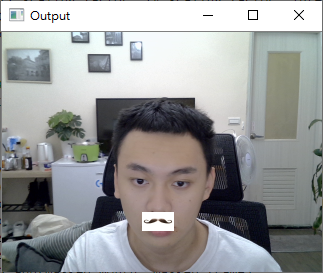